In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=1200, noise=0.2)

In [3]:
data = {'x1': x[:,0], 'x2': x[:,1], 'y': y}

In [4]:
df = pd.DataFrame(data)

In [5]:
df.head(2)

,x1,x2,y
0,-0.015222,1.136804,0
1,-0.791095,0.368759,0


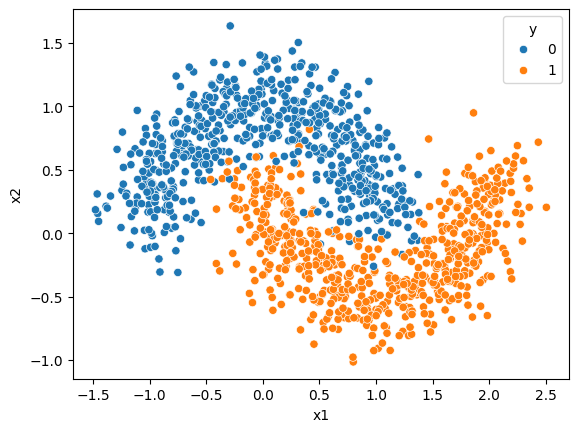

In [6]:
sns.scatterplot(data=df, x='x1', y='x2', hue='y')
plt.show()

In [7]:
x = df.iloc[:, :-1]
y = df['y']

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [10]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC()
knn = KNeighborsClassifier()
gb = GaussianNB()

In [11]:
model = {
    'lr' : lr,
    'dt' : dt,
    'svm' : svm,
    'knn' : knn,
    'gb' : gb
}

In [12]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [13]:
def train_regression(cls, x_train, x_test, y_train, y_test):
    cls.fit(x_train, y_train)
    y_pred = cls.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    recall = recall_score(y_test, y_pred)*100
    precision = precision_score(y_test, y_pred)*100
    return accuracy, recall, precision

In [14]:
for name, cls in model.items():
    acc, rec, pre = train_regression(cls, x_train, x_test, y_train, y_test)
    print(f"For {name}:, acc - {acc:.2f}, rec - {rec:.2f}, pre - {pre:.2f}")

For lr:, acc - 87.08, rec - 91.60, pre - 83.85
For dt:, acc - 96.67, rec - 96.64, pre - 96.64
For svm:, acc - 97.92, rec - 97.48, pre - 98.31
For knn:, acc - 98.33, rec - 98.32, pre - 98.32
For gb:, acc - 87.08, rec - 90.76, pre - 84.38


# Voting Classifier

In [15]:
from sklearn.ensemble import VotingClassifier

In [16]:
li = [('dt1', DecisionTreeClassifier()), ('lr1', LogisticRegression()), ('svm1', SVC()), ('knn1', KNeighborsClassifier()), ('gb1', GaussianNB())]

In [19]:
vc = VotingClassifier(li)
vc.fit(x_train, y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()),
                             ('lr1', LogisticRegression()), ('svm1', SVC()),
                             ('knn1', KNeighborsClassifier()),
                             ('gb1', GaussianNB())])

In [20]:
acc, rec, pre = train_regression(vc, x_train, x_test, y_train, y_test)

In [21]:
acc, rec, pre

(97.91666666666666, 98.31932773109243, 97.5)

In [22]:
prd = {'dt': dt.predict(x_test), 'lr': lr.predict(x_test), 'svm': svm.predict(x_test), 'knn': knn.predict(x_test), 'gb' : gb.predict(x_test), 'vc': vc.predict(x_test)}

In [24]:
score = pd.DataFrame(prd)
score.head(8)

,dt,lr,svm,knn,gb,vc
0,0,0,0,0,0,0
1,0,1,1,1,1,1
2,1,1,1,1,1,1
3,0,0,0,0,0,0
4,1,1,1,1,1,1
5,0,0,0,0,0,0
6,0,0,0,0,0,0
7,1,1,1,1,1,1
